In [36]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [37]:
# Define save path
save_path = r"E:\Learning\eda-visualization-projects\Day3_co2_emissions_eda\images"
os.makedirs(save_path, exist_ok=True)  # Create folder if it doesn't exist

In [38]:

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [39]:
# 2. Load Dataset
file_path = "E:\\Learning\\eda-visualization-projects\\Day3_co2_emissions_eda\\Data\\annual-co2-emissions-per-country.csv"
df = pd.read_csv(file_path)

In [40]:
# 3. Inspect Data
print("\nFirst 5 rows:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing values:\n", df.isnull().sum())


First 5 rows:
         Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  29137 non-null  int64  
 3   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 910.7+ KB

Missing values:
 Entity                     0
Code                    5640
Year                       0
Annual CO₂ emissions       0
dtype: int64


In [41]:

# 4. Data Cleaning
# Rename columns for easier access
df.columns = ["Country", "Code", "Year", "Annual_CO2_emissions"]

In [42]:
# Drop rows with missing values
df.dropna(subset=["Country", "Year", "Annual_CO2_emissions"], inplace=True)

In [43]:
# Ensure correct data types
df["Year"] = df["Year"].astype(int)
df["Annual_CO2_emissions"] = pd.to_numeric(df["Annual_CO2_emissions"], errors="coerce")


In [44]:
# 5. Basic Statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                Year  Annual_CO2_emissions
count  29137.000000          2.913700e+04
mean    1947.718022          4.156982e+08
std       58.985133          1.945853e+09
min     1750.000000          0.000000e+00
25%     1912.000000          3.737280e+05
50%     1962.000000          4.990392e+06
75%     1994.000000          5.327268e+07
max     2023.000000          3.779157e+10


In [45]:
# 6. Global Trend Over Time
global_trend = df.groupby("Year")["Annual_CO2_emissions"].sum().reset_index()


C:\Users\Skarchan PC\AppData\Local\Temp\ipykernel_10268\1648520306.py:8: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\Skarchan PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



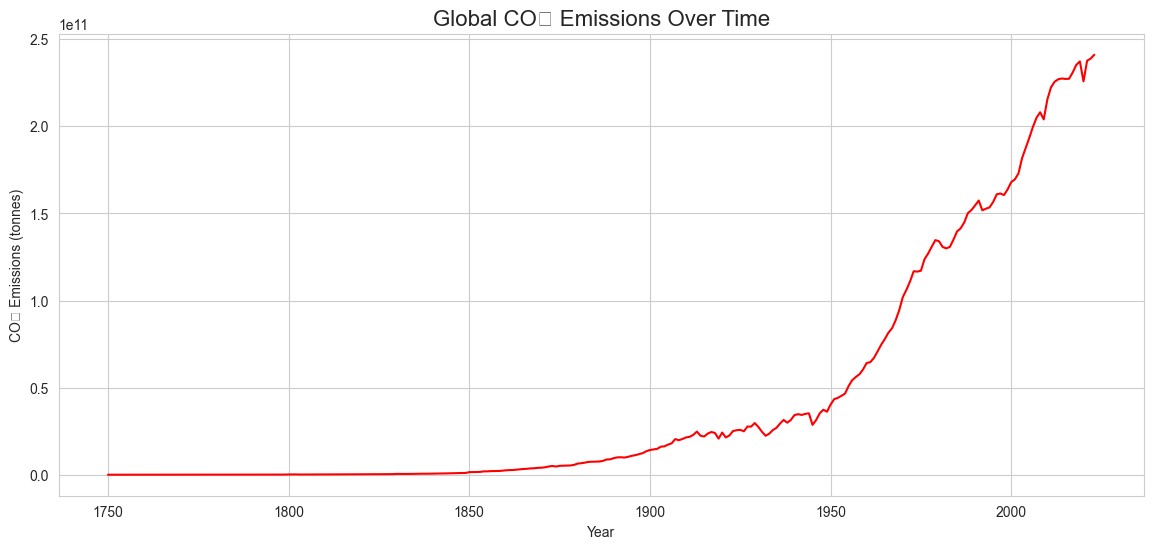

In [46]:
# Plot and save
plt.figure(figsize=(14, 6))
sns.lineplot(x="Year", y="Annual_CO2_emissions", data=global_trend, color="red")
plt.title("Global CO₂ Emissions Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (tonnes)")

plt.savefig(os.path.join(save_path, "global_co2_trend.png"), dpi=300, bbox_inches="tight")
plt.show()

C:\Users\Skarchan PC\AppData\Local\Temp\ipykernel_10268\4242497846.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Skarchan PC\AppData\Local\Temp\ipykernel_10268\4242497846.py:22: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\Skarchan PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



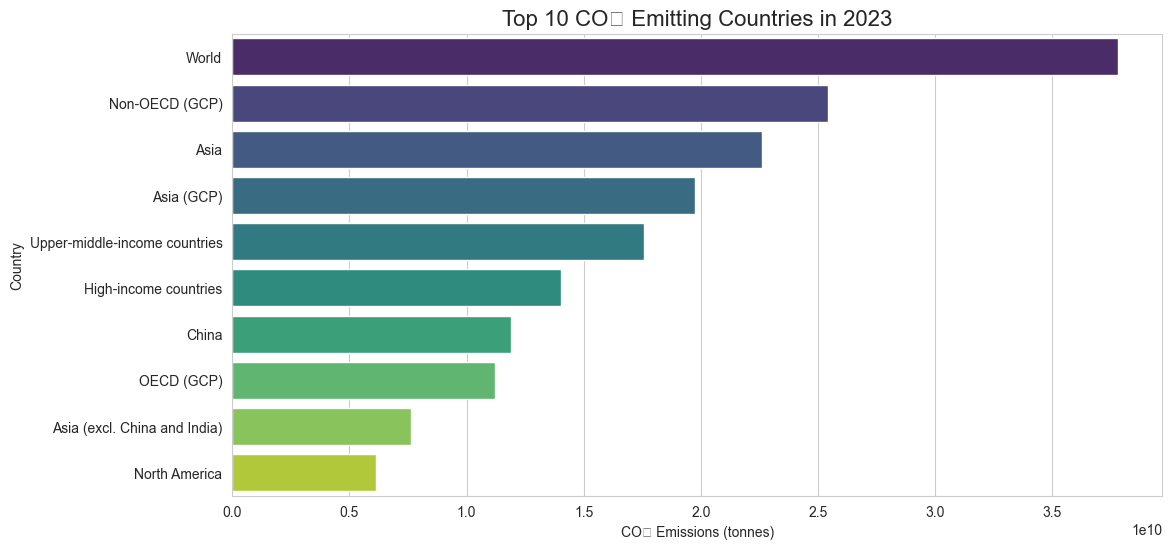

In [47]:
# Get latest year and top emitters
latest_year = df["Year"].max()
top_emitters = (
    df[df["Year"] == latest_year]
    .sort_values(by="Annual_CO2_emissions", ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Annual_CO2_emissions",
    y="Country",
    data=top_emitters,
    palette="viridis"
)
plt.title(f"Top 10 CO₂ Emitting Countries in {latest_year}", fontsize=16)
plt.xlabel("CO₂ Emissions (tonnes)")
plt.ylabel("Country")

# Save and show
plt.savefig(os.path.join(save_path, f"top_10_emitters_{latest_year}.png"),
            dpi=300, bbox_inches="tight")
plt.show()

C:\Users\Skarchan PC\AppData\Local\Temp\ipykernel_10268\2732708702.py:13: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\Skarchan PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



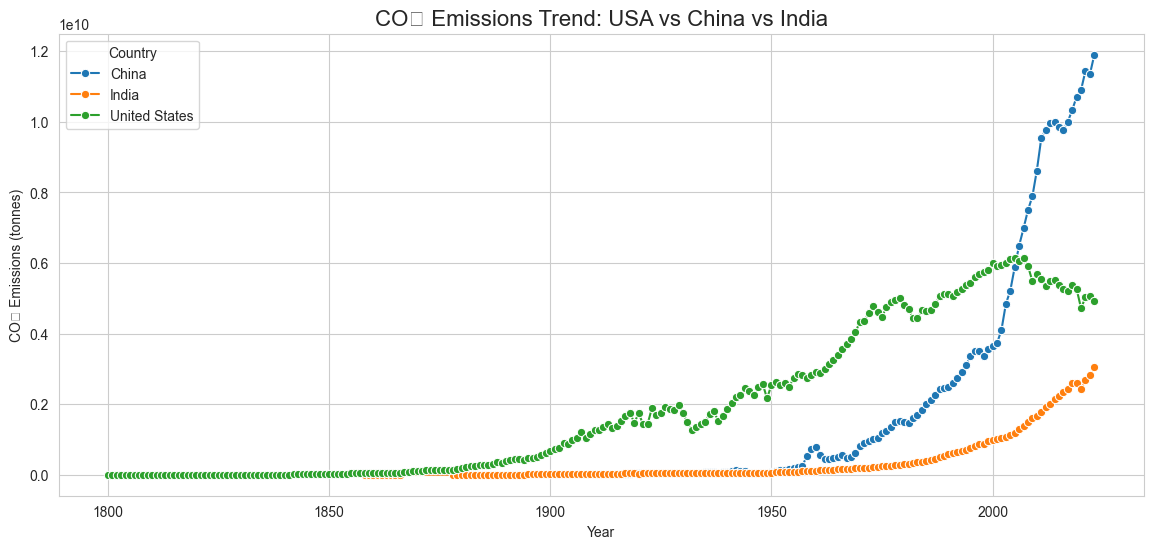

In [48]:
# 8. Country Trend Example (USA, China, India)
countries_to_plot = ["United States", "China", "India"]
subset = df[df["Country"].isin(countries_to_plot)]

plt.figure(figsize=(14, 6))
sns.lineplot(x="Year", y="Annual_CO2_emissions", hue="Country", data=subset, marker="o")
plt.title("CO₂ Emissions Trend: USA vs China vs India", fontsize=16)
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (tonnes)")
plt.legend(title="Country")

# Save image before showing
plt.savefig(os.path.join(save_path, "co2_trend_usa_china_india.png"), dpi=300, bbox_inches="tight")

plt.show()

In [49]:
import os
import plotly.express as px

# Let the user choose the year
year_to_plot = int(input(f"Enter the year to visualize (Available: {df['Year'].min()} - {df['Year'].max()}): "))

# Filter data for that year
df_year = df[df["Year"] == year_to_plot]

# Check if any countries have missing codes
missing_codes = df_year[df_year["Code"].isna()]
if not missing_codes.empty:
    print(f"Warning: {len(missing_codes)} countries have missing ISO codes and will not be plotted.")

# Create interactive map
fig = px.choropleth(
    df_year,
    locations="Code",  # 3-letter country code
    color="Annual_CO2_emissions",
    hover_name="Country",
    color_continuous_scale="YlOrRd",
    title=f"🌍 Global CO₂ Emissions in {year_to_plot}",
    labels={"Annual_CO2_emissions": "CO₂ Emissions (tonnes)"}
)
fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")

# Path to your existing images folder
images_folder = r"E:\Learning\eda-visualization-projects\Day3_co2_emissions_eda\images"

# Ensure folder exists (won't create new one elsewhere)
os.makedirs(images_folder, exist_ok=True)

# Save as HTML (interactive)
fig.write_html(os.path.join(images_folder, f"global_co2_emissions_{year_to_plot}.html"))

# Save as PNG (static) – requires kaleido
try:
    fig.write_image(os.path.join(images_folder, f"global_co2_emissions_{year_to_plot}.png"), scale=2)
except Exception as e:
    print(f"PNG save failed (maybe kaleido not installed): {e}")

# Show interactive map
fig.show()


Enter the year to visualize (Available: 1750 - 2023): 1750
PNG save failed (maybe kaleido not installed): 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido



C:\Users\Skarchan PC\AppData\Local\Temp\ipykernel_10268\93926671.py:13: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\Skarchan PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



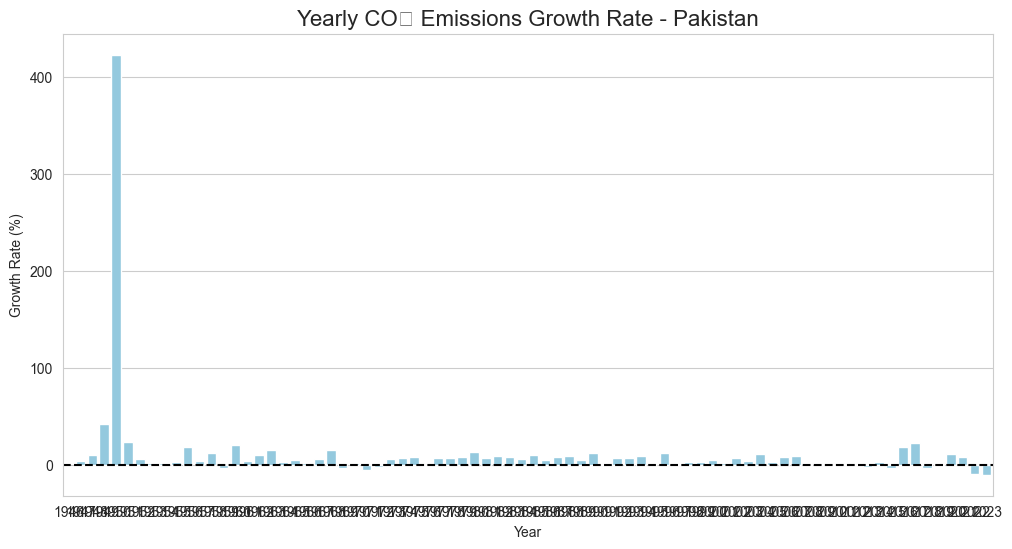

In [50]:
# 10. Yearly Growth Rate for a Country
country_name = "Pakistan"
country_data = df[df["Country"] == country_name].sort_values("Year")
country_data["Growth_Rate_%"] = country_data["Annual_CO2_emissions"].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="Growth_Rate_%", data=country_data, color="skyblue")
plt.axhline(0, color="black", linestyle="--")
plt.title(f"Yearly CO₂ Emissions Growth Rate - {country_name}", fontsize=16)
plt.ylabel("Growth Rate (%)")

# Save the figure inside save_path
plt.savefig(
    os.path.join(save_path, f"growth_rate_{country_name.lower()}.png"),
    dpi=300,
    bbox_inches='tight'
)

plt.show()
